In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [19]:
def crop(img, x, y, width, height):
    return img[y:(y+height), x:(x+width)]

def fractionBlack(img: np.ndarray):
    total = img.shape[0] * img.shape[1]
    white = cv2.countNonZero(img)
    black = total - white
    return black / total

## Player 1

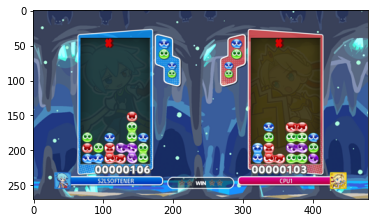

In [20]:
img = np.array(Image.open("./images/regions/ppe_score.png").resize((1920 // 4, 1080 // 4)))
plt.imshow(img)

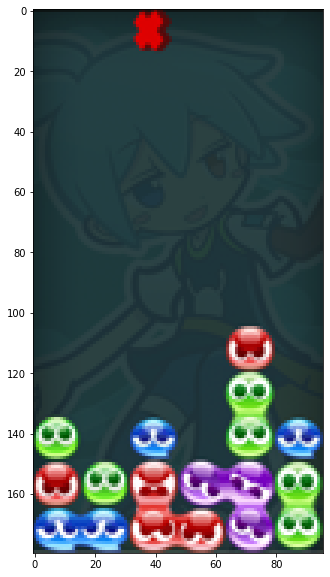

In [21]:
PUYO_W = 16
PUYO_H = 15
FIELD_W = PUYO_W * 6
FIELD_H = PUYO_H * 12

p1_field_x = 70
p1_field_y = 40
p1_field = crop(img, p1_field_x, p1_field_y, FIELD_W, FIELD_H)
plt.figure(figsize=(10, 10))
plt.imshow(p1_field)

plt.show()

88 221 82 15


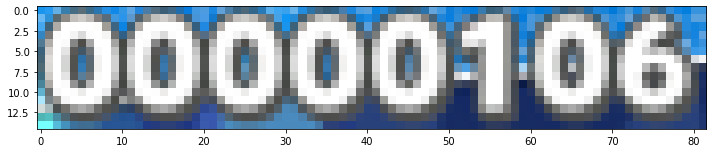

In [22]:
p1_score_x = p1_field_x + 18
p1_score_y = p1_field_y + FIELD_H + 1
score_width = 82
score_height = 15
print(p1_score_x, p1_score_y, score_width, score_height)

p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p1_score)
plt.show()

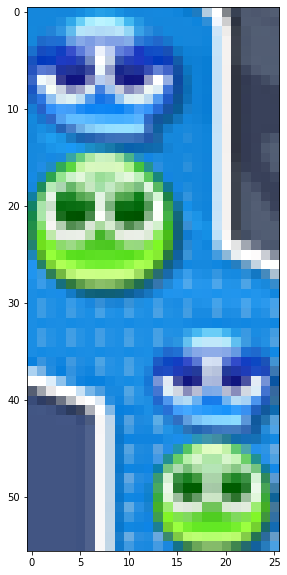

In [23]:
p1_fullnext_x = p1_field_x + FIELD_W + 14
p1_fullnext_y = p1_field_y + 1
fullnext_width = 26
fullnext_height = 56

p1_fullnext = crop(img, p1_fullnext_x, p1_fullnext_y, fullnext_width, fullnext_height)
plt.figure(figsize=(10, 10))
plt.imshow(p1_fullnext)
plt.show()

0 180 56 16 15
1 180 41 16 15
2 194 86 12 11
3 194 74 12 11


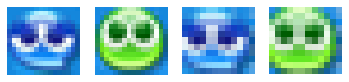

In [24]:
p1_nextpuyos = [
    crop(img, p1_fullnext_x, p1_fullnext_y, PUYO_W, PUYO_H),
    crop(img, p1_fullnext_x, p1_fullnext_y + PUYO_H, PUYO_W, PUYO_H),
    crop(img, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3, 12, 11),
    crop(img, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11),
]

print(0, p1_fullnext_x, p1_fullnext_y + PUYO_H, PUYO_W, PUYO_H)
print(1, p1_fullnext_x, p1_fullnext_y, PUYO_W, PUYO_H)
print(2, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11)
print(3, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3, 12, 11)

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(p1_nextpuyos[i])
    ax[i].axis("off")
plt.show()

In [25]:
# img = np.array(Image.open("./images/regions/ppe_x.png").resize((1920 // 4, 1080 // 4)))
# plt.imshow(img)

### Empty Space in Score Region

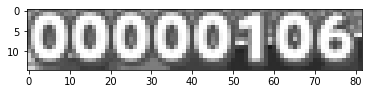

In [26]:
p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
p1_score_gray = cv2.cvtColor(p1_score, cv2.COLOR_RGB2GRAY)
plt.imshow(p1_score_gray, cmap="gray", vmin=0, vmax=255)

0.62


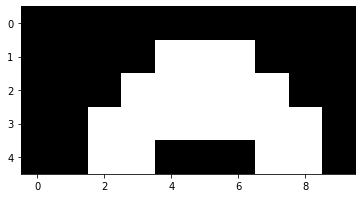

In [27]:
ret, p1_score_gray = cv2.threshold(p1_score_gray, 180, 255, cv2.THRESH_BINARY)
p1_score_sub = p1_score_gray[:5, :10]
p_black = fractionBlack(p1_score_sub)
print(p_black)
plt.imshow(p1_score_sub, cmap="gray", vmin=0, vmax=255)

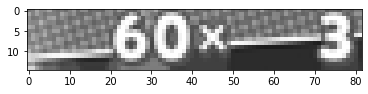

In [28]:
img = np.array(Image.open("./images/regions/ppe_x.png").resize((1920 // 4, 1080 // 4)))
p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
p1_score_gray = cv2.cvtColor(p1_score, cv2.COLOR_RGB2GRAY)
plt.imshow(p1_score_gray, cmap="gray", vmin=0, vmax=255)

1.0


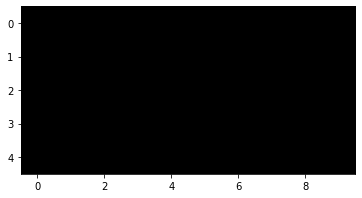

In [30]:
ret, p1_score_gray = cv2.threshold(p1_score_gray, 180, 255, cv2.THRESH_BINARY)
p1_score_sub = p1_score_gray[:5, :10]
p_black = fractionBlack(p1_score_sub)
print(p_black)
plt.imshow(p1_score_sub, cmap="gray", vmin=0, vmax=255)

## Player 2

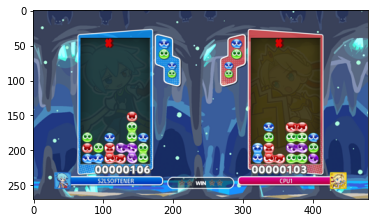

In [31]:
img = np.array(Image.open("./images/regions/ppe_score.png").resize((1920 // 4, 1080 // 4)))
plt.imshow(img)

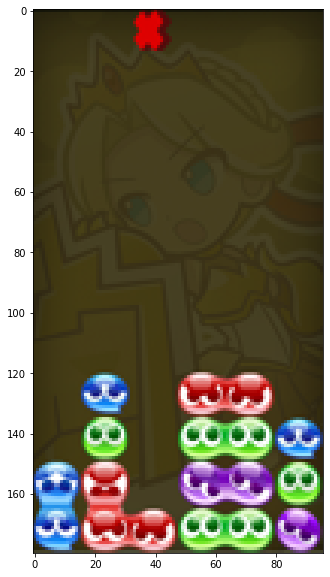

In [32]:
p2_field_x = 314
p2_field_y = 40
p2_field = crop(img, p2_field_x, p2_field_y, FIELD_W, FIELD_H)
plt.figure(figsize=(10, 10))
plt.imshow(p2_field)

312 221 82 15


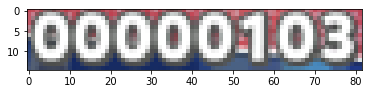

In [36]:
p2_score_x = p2_field_x - 2
p2_score_y = p2_field_y + FIELD_H + 1
print(p2_score_x, p2_score_y, score_width, score_height)

p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
plt.imshow(p2_score)
plt.show()

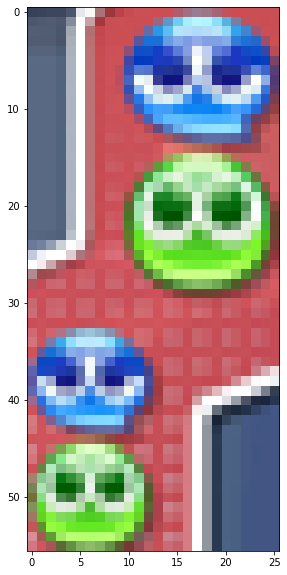

In [38]:
p2_fullnext_x = 274
p2_fullnext_y = 41
p2_fullnext = crop(img, p2_fullnext_x, p2_fullnext_y, fullnext_width, fullnext_height)
plt.figure(figsize=(10, 10))
plt.imshow(p2_fullnext)
plt.show()

284 56 16 15
284 41 16 15
274 86 12 11
274 74 12 11


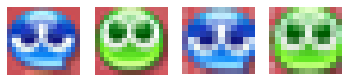

In [39]:
p2_nextpuyos = [
    crop(img, p2_fullnext_x + 10, p2_fullnext_y, PUYO_W, PUYO_H),
    crop(img, p2_fullnext_x + 10, p2_fullnext_y + PUYO_H, PUYO_W, PUYO_H),
    crop(img, p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3, 12, 11),
    crop(img, p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11),
]

print(p2_fullnext_x + 10, p2_fullnext_y + PUYO_H, PUYO_W, PUYO_H)
print(p2_fullnext_x + 10, p2_fullnext_y, PUYO_W, PUYO_H)
print(p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11)
print(p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3, 12, 11)

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(p2_nextpuyos[i])
    ax[i].axis("off")
plt.show()

### Empty Space in Score Region

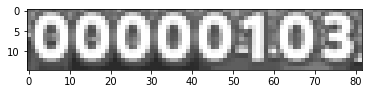

In [40]:
p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
p2_score_gray = cv2.cvtColor(p2_score, cv2.COLOR_RGB2GRAY)
plt.imshow(p2_score_gray, cmap="gray", vmin=0, vmax=255)

0.56


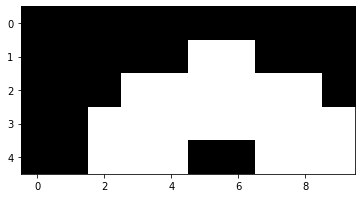

In [41]:
ret, p2_score_gray = cv2.threshold(p2_score_gray, 180, 255, cv2.THRESH_BINARY)
p2_score_sub = p2_score_gray[:5, :10]
p_black = fractionBlack(p2_score_sub)
print(p_black)
plt.imshow(p2_score_sub, cmap="gray", vmin=0, vmax=255)

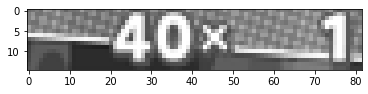

In [48]:
img = np.array(Image.open("./images/regions/ppe_score2.png").resize((1920 // 4, 1080 // 4)))
p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
p2_score_gray = cv2.cvtColor(p2_score, cv2.COLOR_RGB2GRAY)
plt.imshow(p2_score_gray, cmap="gray", vmin=0, vmax=255)

1.0


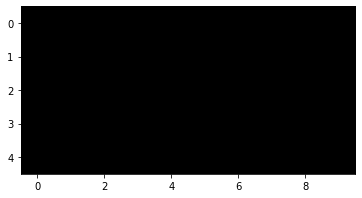

In [49]:
ret, p2_score_gray = cv2.threshold(p2_score_gray, 180, 255, cv2.THRESH_BINARY)
p2_score_sub = p2_score_gray[:5, :10]
p_black = fractionBlack(p2_score_sub)
print(p_black)
plt.imshow(p2_score_sub, cmap="gray", vmin=0, vmax=255)